<center>
<div style="background-color:#e0f7fa; padding:15px; border-radius:10px;">
  <h1 style="color:#00796b; font-weight:bold;">
    Machine Learning for Diabetes Detection
  </h1>
</div>
</center>


<center>
<img src = "./Data/diabetes.jpg" width = 1000 >
</center>


## INTRODUCTION : 
 According to ***World Health Organization*** : 

**Diabetes** is a chronic, metabolic disease characterized by elevated levels of **blood glucose** (or blood sugar), which leads over time to serious damage to the **heart**, **blood vessels**, **eyes**, **kidneys** and **nerves**. The most common is **type 2 diabetes**, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough **insulin**. In the past 3 decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. **Type 1 diabetes**, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. 

About **830 million** people worldwide have diabetes, the majority living in **low-and middle-income** countries. More than half of people living with diabetes are not receiving treatment. Both the number of people with diabetes and the number of people with untreated diabetes have been steadily increasing over the past decades.

**Symptoms** of **type 1 diabetes** include the *need to urinate often, thirst, constant hunger, weight loss, vision changes and fatigue*. These symptoms may occur suddenly. Symptoms for **type 2 diabetes** are generally similar to those of type 1 diabetes but are often **less marked**. As a result, the disease may be diagnosed several years after onset, after complications have already arisen. For this reason, it is important to be aware of risk factors. 

## Objective : 

Objective of this notebook is to utilize [PIMA INDIANS DIABETES DATASET](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data) to :

1. Use EDA to explore the dataset and get useful insights out of it.
2. Create a predictive model to detect diabetes.
3. Evaluate, Improve and Interprete the model.


**NOTE** : Available dataset only takes into account **female** data.

# CONTENTS : 

1. [Exploratory Data Analysis](#1-Exploratory-Data-Analysis(EDA))

   1.1 [Data Dictionary](#1.1-Data-Dictionary)
   
   1.2 [Data Description](#1.2-Data-Description)

   1.3 [Exploring Features/Tragets Visually](#1.3-Exploring-Features/Tragets-Visually )

   1.4 [Data Preprocessing](#1.4-Data-Preprocessing)
   
    
2. [Making Predictions Using Models](#2.-Making-Predictions-Using-Models)

3. [Evaluating our models](#3.-Evaluating-our-models)

   3.1 [Evaluating using scores](#3.1-Evaluating-Based-upon-Accuracy-,-Precision,-Recall-and-F1-Score)

   3.2 [ROC AUC Curves](#3.2-ROC-AUC-Curves-(Reciever-Operator-Curve-Area-Under-the-Curve))

   3.3 [Confusion Matrix](#3.3-Confusion-Matrix)

   3.4 [Hyper Parameter Tunning](#3.4-Hyper-Parameter-Tunning) 

   3.5 [Model Inerpretation](#3.5-Model-Interpretation)


In [46]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 1. Exploratory Data Analysis (EDA)

In [47]:
diabetes_dataset = pd.read_csv("./Data/diabetes.csv") #loading the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.1 Data Dictionary

**Feature Variables** : 

1. **Pregnancies** : The number of pregnancies the patient has had.
2. **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. **BloodPressure** : Diastolic blood pressure (mm Hg).
4. **SkinThickness** : Triceps skin fold thickness (mm).
5. **Insulin** : 2-Hour serum insulin (mu U/ml).
6. **BMI** : Body mass index (weight in kg/(height in m)^2)
7. **Diabetes Pedigree Function** : a function that scores the probability of diabetes based on family history.
8. **Age** : Age of patient in years.

**Target variable** :

9. **Outcome** : Whether or not patient has diabetes.

### 1.2 Data Description

In [48]:
print(f"shape of our data is {diabetes_dataset.shape}") #checking number of rows and columns

shape of our data is (768, 9)


In [49]:
diabetes_dataset.dtypes   #checking for datatypes of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [50]:
diabetes_dataset.describe() # describes the dataset based upon some simple statistical measures

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
diabetes_dataset.isnull().sum()  # checking for Nan values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
zero_count = (diabetes_dataset==0).sum() #How many zeros are there in each column
zero_count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<Axes: title={'center': 'Zeros count'}>

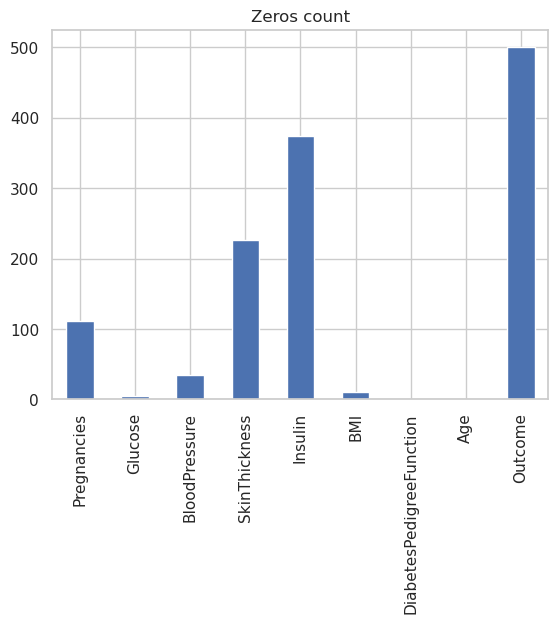

In [53]:
zero_count.plot(kind = "bar" , title = "Zeros count")

#### **Observations** : 

* Our dataset has a **shape (768,9)** which means it consist of 768 rows and 9 columns. Out of these 9 columns **"Outcome"** is our target variable and rest of them are feature variables.
* The datatype of each columns is either **integer** or **float**. So they are already numerical features and there aren't any categorical features which excludes the need of label encoding.
* Our Data set does not have any Nan / Null values in any columns.
  
* **Pregnancies**
  * Minimum : 0 Maximum : 17
  

* **Glucose** :
  * Minimum : 0  Maximum 119
  
* **BloodPressure** :
   * Minimum : 0 Maximum 122
   
* **SkinThickness** :
  * Minimum : 0 Maximum 99
  
* **Insulin** :
  * Minimum : 0 Maximum 846
  
* **BMI** :
  * Minimum : 0 Maximum 67
  
* **Diabetes Pedigree Function** :
  * Minimum : 0.078000	 Maximum 2.42
  
* **Age** :
  * Minimum : 21  Maximum 81
  
* **Outcome** :
   * 0 indicates patient does not have diabetes.
   * 1 indicates patient has diabetes.

#### Abnormal Zero values : 

* Minimum value of Glucose, Blood Pressure, SkinThickness and BMI is 0 which is not logically possible. So we will have to consider them as missing values and perform required data preprocessing and cleaning.
* Minimum Value of Insulin is 0 which is very rare and should also be treated as missing value.

#### Action : 

* We will have to impute missing values with safer alternate data as dropping rows with missing values would drastically lose data.
* If the data is skewed we will impute the missing values with median.
* If the data is normally distributed then we will impute missing data with mean.

[Back to Top ☝️](#INTRODUCTION-:)

## 1.3 Exploring Features/Tragets Visually 

    In this section we will use various types of plots for both feature variables and target variables to check the data. What we will be achieving with each plot is as below :

* ### Feature variables (Univariate : one at a time) :
    1. **Kde Plot (Kernel Density Plot)** : To check the distribution of data. Is it skewed , normal or any other type of distribution.
    2. **Box Plot** : To check the spread of the data and to check for any potential outliers in our data (values which are at extremes).

* ### Feature variables (Multivariate plot : comparing all features) :

     **Pair Plot (Scatter plot matrix)** : To check relationship between feature variables (correlations or liner/non-linear relationship. Also another way to check the distribution of data and outliers)

* ### Target Variable 

    **CountPlot** : To check if the classes(0 and 1) are balanced or imbalanced as imbalance may affect the biasness of the model towards majority class.

* ### Feature vs Target : 

    **Pair Plot** : To visualise which features seperates the target variable well. Also checks for the variables that combined could seperate targets well and for any correlation between features and target. Useful to know which features are more predictive.

### 1.3.1 Features KDE Plots and Box Plots


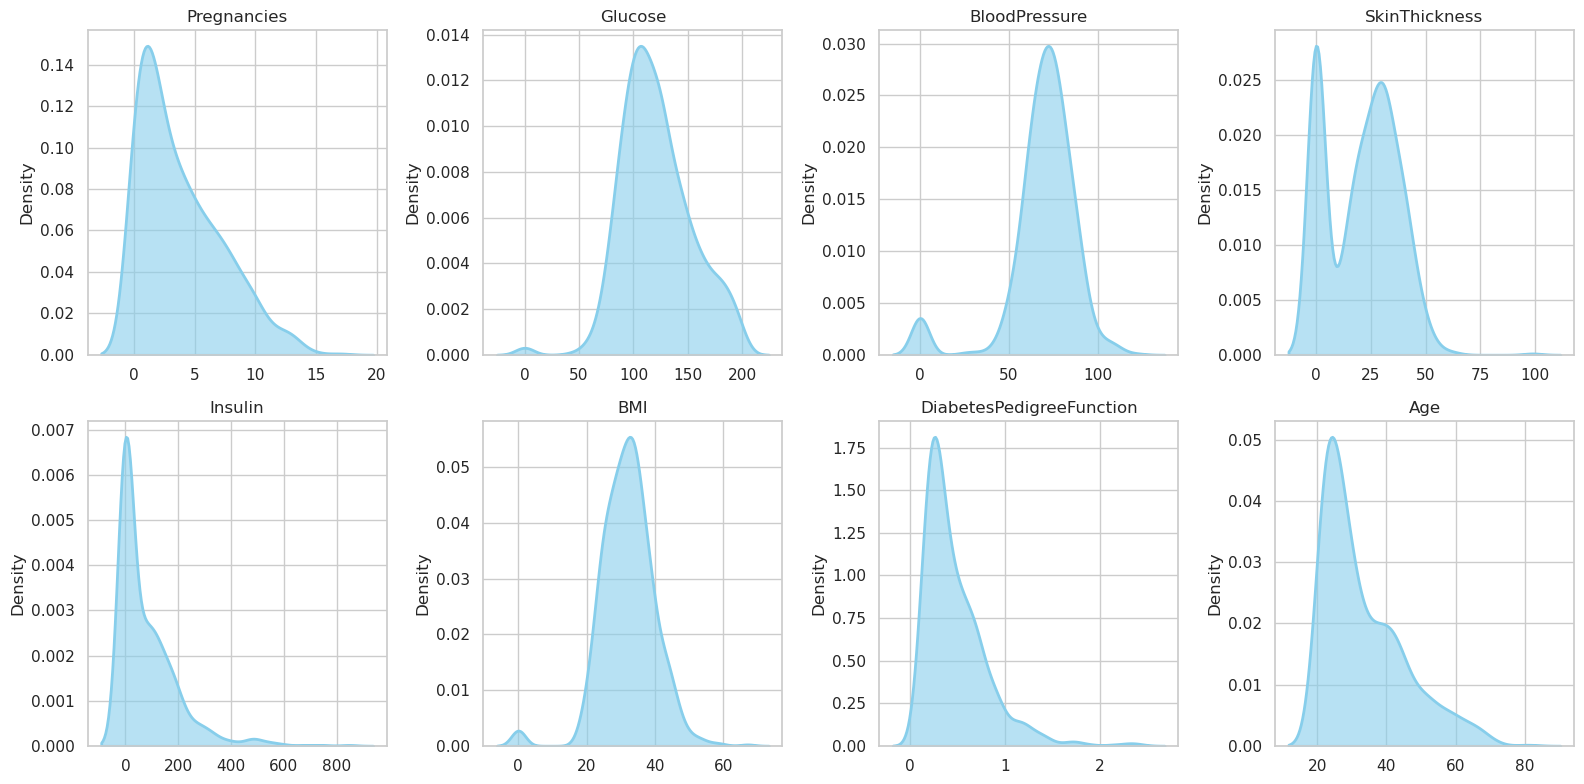

In [54]:
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
]

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots (2 rows x 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and axis
for ax, feature in zip(axes, features):
    sns.kdeplot(
        data=diabetes_dataset,
        x=feature,
        fill=True,
        color="skyblue",
        alpha=0.6,
        linewidth=2,
        ax=ax
    )
    ax.set_title(feature, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Density")

# Remove any unused subplots (in case number of features < total subplots)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing
plt.tight_layout()
plt.show()


**Observations :**
* From the above **kde plots** we can infer that only data in **BloodPressure** feature is **normally distributed** and rest all features are **skewed** right.

* Long tail in insulin indicates potential outliers.

* Spikes at value zero in Glucose , BloodPressure , insulin , skinthickness , BMI are not logical.


[Back to Top☝️](#INTRODUCTION-:)

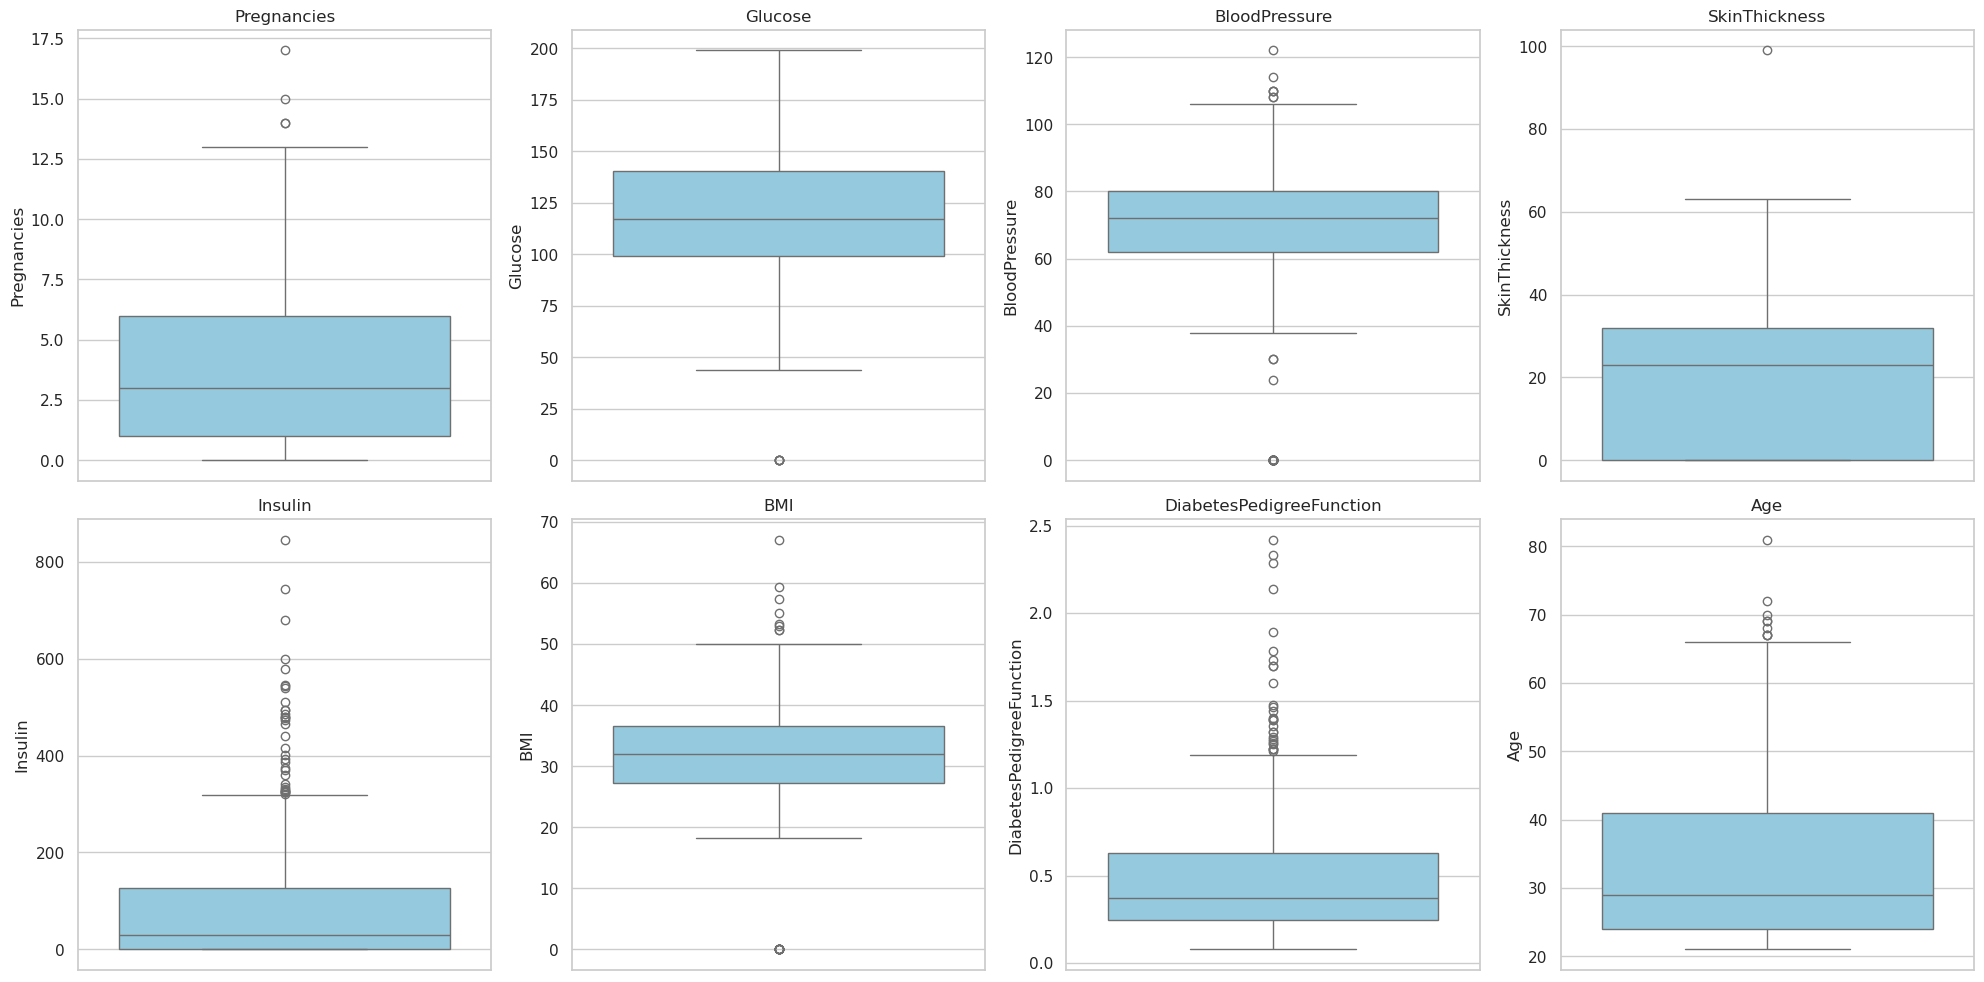

In [55]:
features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Set up grid: e.g., 2 rows x 4 columns
n_rows = 2
n_cols = 4

plt.figure(figsize=(20, 10))  # Adjust size as needed

for idx, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(
        y=diabetes_dataset[feature],
        color="skyblue"
    )
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()


**Observations** 

Insulin and DiabetesPedegreeFunction feature variable has potentially many outliers awhile other features having very few. But the outliers here makes sense as these high values are logically possible in some people. So we will keep them as it is.

[Back to Top☝️](#INTRODUCTION-:)

### 1.3.2 Features pairplot

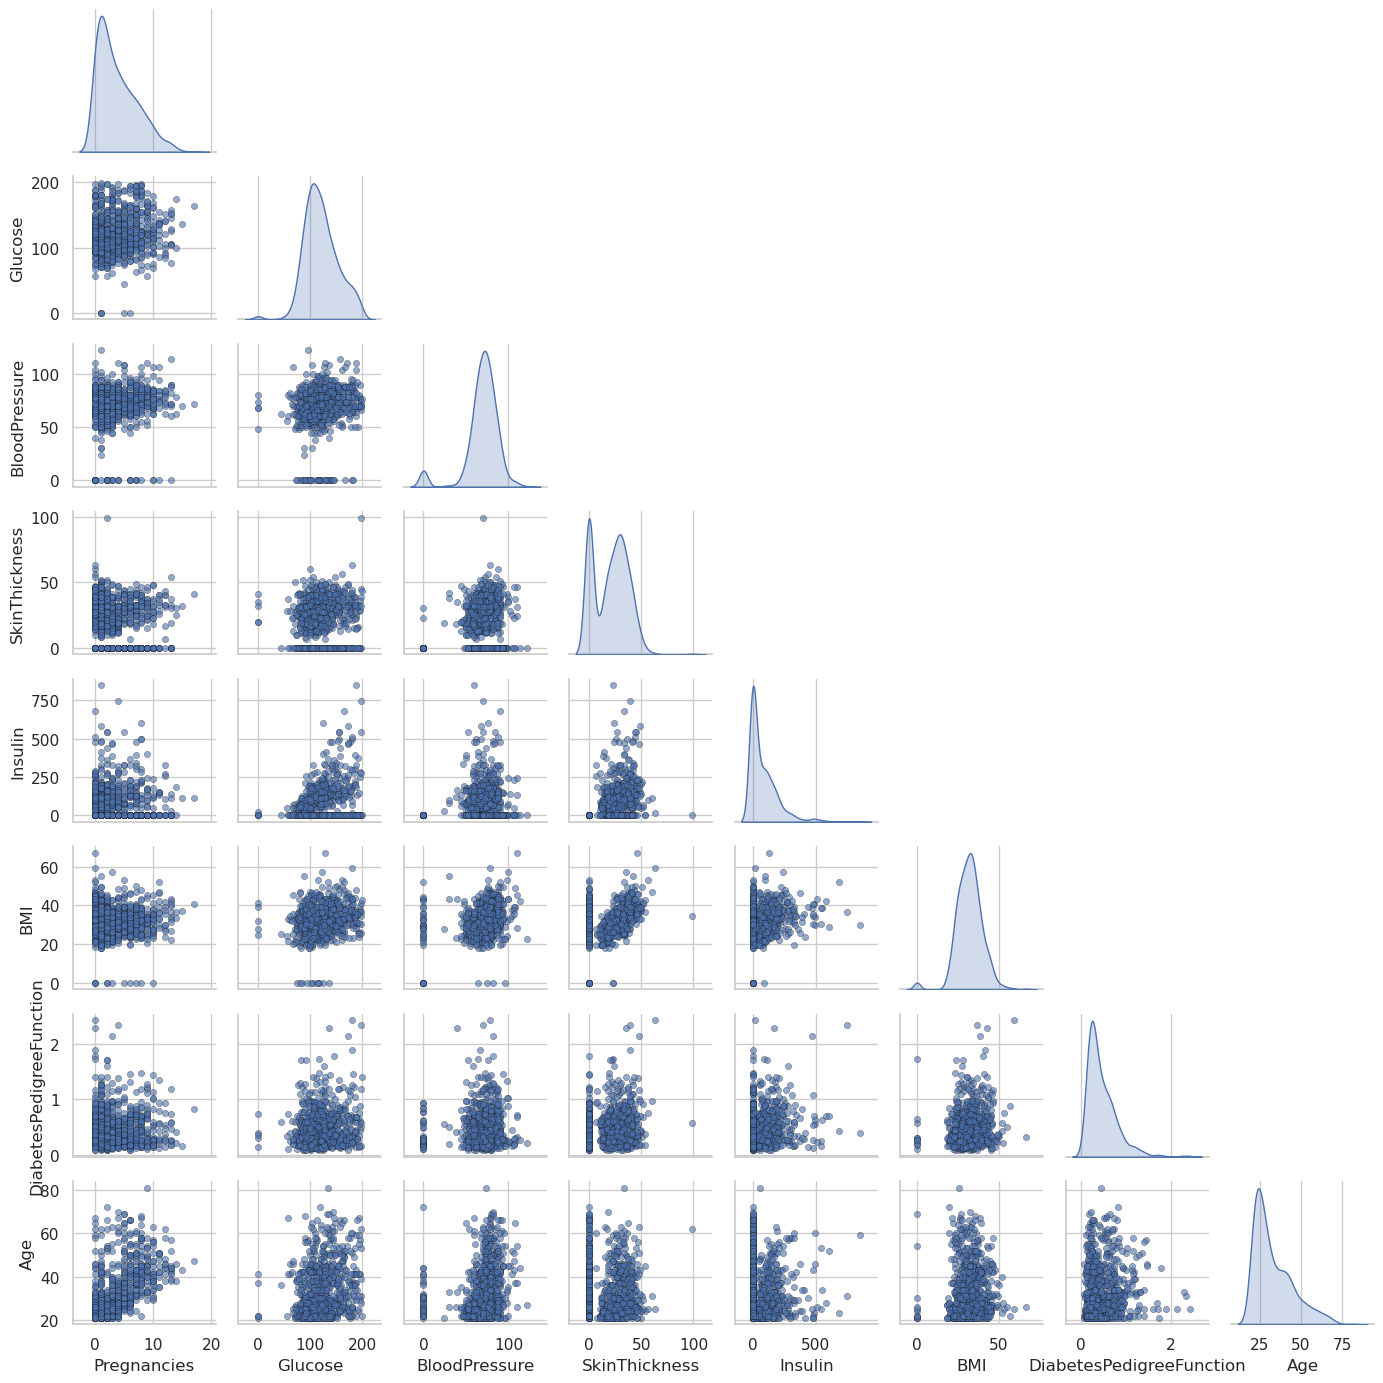

In [56]:
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
]

# Set style
sns.set(style="whitegrid")

# Create pairplot
pair_plot = sns.pairplot(
    data=diabetes_dataset[features],
    corner=True,       # Only show lower triangle (less clutter)
    plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k'}, # Scatter style
    diag_kind='kde'    # KDE on the diagonal
)

# Adjust overall figure
pair_plot.fig.set_size_inches(14, 14)
pair_plot.fig.tight_layout()

plt.show()


**Observations**
* We can infer from the above pair plot scatter plots that mostly all features are very lightly correlated so multicollinearity    should not be an issue here. 
* Insulin feature have potential higher outliers.
* Most of the features are right-skewed (tail towards right side).

[Back to Top☝️](#INTRODUCTION-:)

### 1.3.3 Target Variable

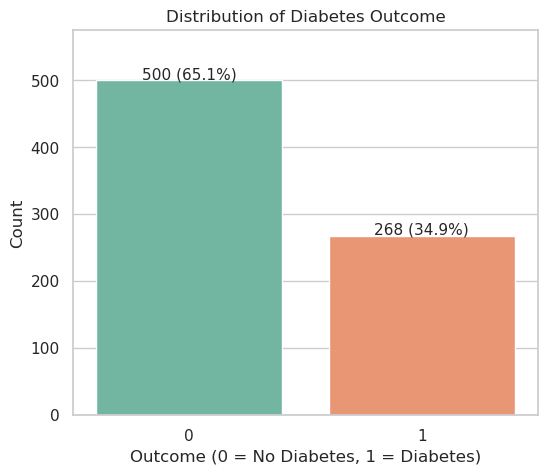

In [57]:
sns.set(style="whitegrid")

# Compute counts and percentages
outcome_counts = diabetes_dataset["Outcome"].value_counts().sort_index()
total = outcome_counts.sum()
percentages = (outcome_counts / total) * 100

# Create the bar plot
plt.figure(figsize=(6,5))
ax = sns.countplot(
    data=diabetes_dataset,
    x="Outcome",
    palette="Set2"
)

# Add counts and percentages on top of the bars
for i, count in enumerate(outcome_counts):
    pct = percentages[i]
    ax.text(
        i, 
        count + 2, 
        f"{count} ({pct:.1f}%)", 
        ha="center", 
        fontsize=11
    )

# Set labels and title
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.ylim(0, outcome_counts.max() * 1.15)  # Add space above bars
plt.show()


**Observations**
The classes here seems to be somewhat imbalanced as 65% of data is 0 and only 35% of data is 1. But the imbalance is light so we will counter it with class_weight parameter in our models itself.

[Back to Top☝️](#INTRODUCTION-:)

### 1.3.4 Features vs Target pairplot

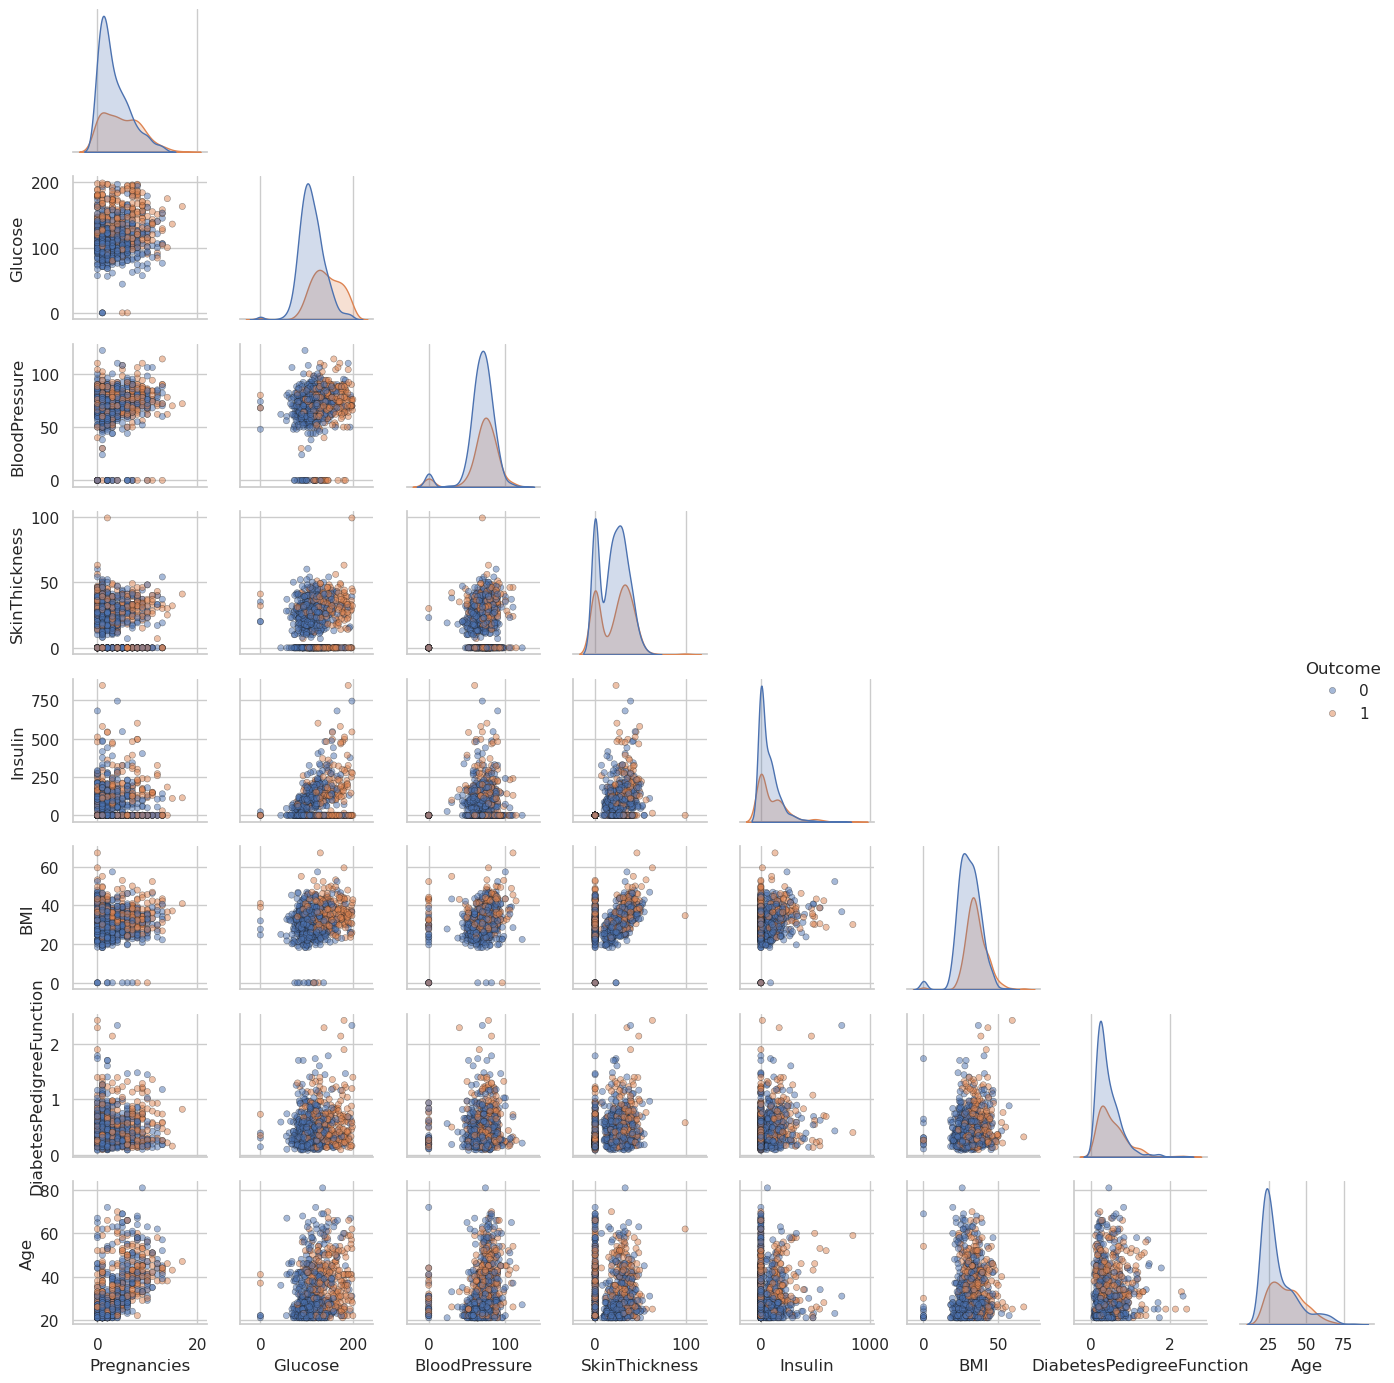

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features you want to plot
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
]

# Set style
sns.set(style="whitegrid")

# Create pairplot
pair_plot = sns.pairplot(
    data=diabetes_dataset,
    vars=features,
    hue="Outcome",        # Color by Outcome (0 or 1)
    corner=True,          # Show only lower triangle
    diag_kind="kde",      # KDE on diagonals
    plot_kws={'alpha':0.5, 's':20, 'edgecolor':'k'}  # Style scatter points
)

# Adjust figure size and layout
pair_plot.fig.set_size_inches(14, 14)
pair_plot.fig.tight_layout()

plt.show()


**Observations** : 

* We can see that feature variable **'Glucose'** does a great job in classifying target variables.
* Also we dont see any effective correlations between our features and target.
* From the diagonal  density plots we can see that only "Glucose" seperates the classes to an extent rest features does not do a good job as  moslty the curves overlaps.

[Back to Top☝️](#INTRODUCTION-:)

## <center> Summary of EDA </center>

<u> **OBSERVATIONS :** </u>
1. Our Dataset has `768 rows` and `9 columns`.
2. All data is either `integer` or `float` data type.
3. We do not have any `Nan` Values.
4. We have many `zero values` in feature variables.
5. Feature data is mostly right skewed except for `BloodPressure`.
6. We do not see any major `correlation` between features as well as feature and outcome.

<u>**Problems** </u>

1. Unexpected zero values in our features.
2. Data is right skewed.

[Back to Top☝️](#INTRODUCTION-:)

### 1.4 Data Preprocessing

**Problem 1 and its approach:**
* As our Data set has some unexplained 0 values /in some features which could lead to errors in our model prediction so we need to first convert them into Nan values and then impute with the alternate values.
* We need to split data into training and test sets.
* Look for skewness in data.
* We need to perform data preprocessing carefully on Training and Test set as we do not want our test data to be leaked.
* We need to perform imputation only on features which have illogical zero values.
* Finally we need to convert our data back in the same format as it was.
  
* **Imputation**
  * If skew (-1,1) approximately normal distribution so we will impute with mean.
  * If skew >1 or skew <-1 impute with median as data is skewed.

**SKEWED DATA**  : Data whose curve has a long tail on any one side.

**NORMALLY DISTRIBUTED** : Data which follows a bell shaped curve and mostly values are near the mean.

**NOTE** : These imputations are approximate values and may not be reliable for real medical application. Because of lack of domain knowledge I am unable to impute precise or near precise values.


**Problem 2 and approach :**
* As most of our feature variables have data right skewed we need to fix this.
* We will perform Log Transformation on specific features which will reduce our right skewness in data and make it normal.
* Log (0) is undefined so we need to first work on Problem 1. or we can use `np.log1p()`

In [59]:
#Importing necessary modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

#### 1.4.1 Replacing zero values with Numpy Nan values

In [60]:
diabetes_dataset = diabetes_dataset.sample(frac = 1, random_state = 42 ).reset_index(drop=True)
original_feat_names = diabetes_dataset.columns
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  # Columns which needs to be fixed in essence columns in which imputation is required.

diabetes_dataset[features] = diabetes_dataset[features].replace(0, np.nan) # replacing zeros with Nan values
diabetes_dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0


#### 1.4.2 Splitting Data

In [61]:
# Create X and y 
X = diabetes_dataset.drop(columns="Outcome") #Input data
y = diabetes_dataset["Outcome"]  #Output data / Target

# Split data into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) # splits data into  80% training and 20% test.


#### 1.4.3 Checking the skewness of data in specific features which needs imputation

In [62]:
#By using skew() function
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in features : 
    skew = diabetes_dataset[i].skew()

    if skew > 0.5 or skew < -0.5 :
        print(f"{i} is skewed and impute with median")

    else :
        print(f"{i} is near normal distribution so impute with mean")

Glucose is skewed and impute with median
BloodPressure is near normal distribution so impute with mean
SkinThickness is skewed and impute with median
Insulin is skewed and impute with median
BMI is skewed and impute with median


#### 1.4.4 Imputing Missing Values

In [63]:
# Filling Missing Values
features_mean = ["BloodPressure"]    # feature to be imputed with mean value of that particular column.
features_median = ["Glucose" , "SkinThickness", "Insulin", "BMI"] #features to be imputed with mean values of respective columns.

#Instantiating Imputers
imputer_median = SimpleImputer(strategy = "median")
imputer_mean = SimpleImputer(strategy = "mean")

#Instantiating ColumnTransformer which applies imputers to only specified columns.
transformer = ColumnTransformer([("imputed_median",imputer_median, features_median),
                                ("imputed_mean", imputer_mean, features_mean)], remainder = "passthrough")

## above transformer takes (name , transformer(imputer) , list of features to be applied upon). Remainder = passthrough lets 
## the results to join all columns together even the ones which are not specified in it so that we get whole data back.

In [64]:
# Finally Applying transformer to the data

X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
feature_names = transformer.get_feature_names_out()

type(X_train_trans)

numpy.ndarray

#### 1.4.5 Converting final data to DataFrame

In [65]:
# Converting tranformed data from ndarray to dataframe
X_train_final = pd.DataFrame(X_train_trans ,columns = feature_names)
X_test_final = pd.DataFrame(X_test_trans , columns = feature_names)

X_train_final.head()

,imputed_median__Glucose,imputed_median__SkinThickness,imputed_median__Insulin,imputed_median__BMI,imputed_mean__BloodPressure,remainder__Pregnancies,remainder__DiabetesPedigreeFunction,remainder__Age
0,154.0,32.0,120.0,32.4,78.0,8.0,0.443,45.0
1,129.0,49.0,125.0,38.5,68.0,7.0,0.439,43.0
2,81.0,16.0,66.0,27.5,86.0,3.0,0.306,22.0
3,129.0,49.0,155.0,36.4,92.0,3.0,0.968,32.0
4,95.0,18.0,58.0,23.9,60.0,1.0,0.260,22.0


In [66]:
# Changing column names to orginal column names (columns are shuffled after transformation)

original_feature_names = ["Glucose","SkinThickness", "Insulin", "BMI", "BloodPressure", 'Pregnancies', 'DiabetesPedigreeFunction', 'Age']
X_train_final.columns = original_feature_names
X_test_final.columns = original_feature_names
X_train_final.head()

,Glucose,SkinThickness,Insulin,BMI,BloodPressure,Pregnancies,DiabetesPedigreeFunction,Age
0,154.0,32.0,120.0,32.4,78.0,8.0,0.443,45.0
1,129.0,49.0,125.0,38.5,68.0,7.0,0.439,43.0
2,81.0,16.0,66.0,27.5,86.0,3.0,0.306,22.0
3,129.0,49.0,155.0,36.4,92.0,3.0,0.968,32.0
4,95.0,18.0,58.0,23.9,60.0,1.0,0.260,22.0


#### 1.4.6 Performing Log Transformation

In [67]:
features = ["Glucose" , "SkinThickness", "Insulin", "BMI", "Pregnancies", "DiabetesPedigreeFunction","Age"]

for feature in features :
    X_train_final[feature] = np.log1p(X_train_final[feature])
    X_test_final[feature]  = np.log1p(X_test_final[feature])

X_train_final.head()

,Glucose,SkinThickness,Insulin,BMI,BloodPressure,Pregnancies,DiabetesPedigreeFunction,Age
0,5.043425,3.496508,4.795791,3.508556,78.0,2.197225,0.366724,3.828641
1,4.867534,3.912023,4.836282,3.676301,68.0,2.079442,0.363948,3.784190
2,4.406719,2.833213,4.204693,3.349904,86.0,1.386294,0.266969,3.135494
3,4.867534,3.912023,5.049856,3.621671,92.0,1.386294,0.677018,3.496508
4,4.564348,2.944439,4.077537,3.214868,60.0,0.693147,0.231112,3.135494


#### Feature Scaling and encoding : 
* As We are going to use only tree based models which are not dependent on euclidean distance so feature scaling is not necessary here. Also we dont have much differences in max values of our features.
  
* All the data is in numerical form and we dont see any categorical features so feature encoding is also not necessary here.

[Back to Top☝️](#1.4-Data-Preprocessing)

# 2. Making Predictions Using Models

Our problem satement is to detect diabetes in patients which is a classic classification problem as we have to predict one class or the other. Moreover it is a binary classification problem. We will be using classification models : Ensemble Models : RandomForest and GradientBoosting , Support Vector Machines : Support Vector Classifier(SVC) and NuSVC, Linear_Model : Logistic Regression.

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression , RidgeClassifier

np.random.seed(42)
models = {
          "RandomForest" : RandomForestClassifier(class_weight = "balanced",random_state =42),
          "GradientBoosting" : GradientBoostingClassifier(random_state = 42),
          "SVC" : SVC(probability = True, random_state = 42,),
          "NuSVC": NuSVC(probability = True, random_state = 42),
          "LogisticRegression": LogisticRegression(max_iter = 1000, random_state = 42),
          "RidgeClassifier" : RidgeClassifier(random_state = 42)
         }

y_preds = {}                     #predictions of each model will be stored in this dictionary along with model names as key.
y_scores = {}                    # Positives prediction Probabilities will be stored along with model name as the key.
for name, model in models.items() :
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    
    if hasattr(model , 'predict_proba'):
        y_score = model.predict_proba(X_test_final)[:,1]

    else :
        y_score = model.decision_function(X_test_final)

    y_preds[name] = y_pred
    y_scores[name] = y_score 
    
y_preds

{'RandomForest': array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]),
 'GradientBoosting': array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,


[Back to Top☝️](#INTRODUCTION-:)

# 3. Evaluating our models

### 3.1 Evaluating Based upon Accuracy , Precision, Recall and F1 Score

**Accuracy**  
- Overall proportion of correct predictions.  
- Formula: (TP + TN) / (TP + FP + FN + TN)

**Precision**  
- Out of all predicted positives, how many are truly positive.  
- Formula: TP / (TP + FP)

**Recall (Sensitivity)**  
- One-liner: Out of all actual positives, how many did we correctly predict.  
- Formula: TP / (TP + FN)

**F1 Score**  
- One-liner: Harmonic mean of precision and recall.  
- Formula: 2 * (Precision * Recall) / (Precision + Recall)

* **TP** = True Positives , **FP** = False Positives
* **TN** = True Negatives , **FN** = False Negatives

In [69]:
# Creating an evaluation function
from sklearn.metrics import precision_score , recall_score , accuracy_score , f1_score
from sklearn.model_selection import cross_val_score

def evaluate(y_preds, y_true):
    ''' Evaluates the model based upon accuracy, precision , recall and f1 score '''

    accuracy = accuracy_score(y_preds, y_true)
    precision = precision_score(y_preds, y_true)
    recall = recall_score(y_preds, y_true , zero_division = 0)
    f1score = f1_score(y_preds, y_true)
    metric_dict = {"Accuracy" : accuracy , "Precision": precision , "Recall": recall , "f1_score": f1score }

    return metric_dict

def cross_eval(X_train , y_train, model ) :
    cross_validation = cross_val_score(model, X_train, y_train, cv=5).mean()
    metric_dict =  {"Cross_val_score": cross_validation}

    return metric_dict

In [70]:
final_metric_dict = {}
for name, predictions in y_preds.items() :
    metric_dict = evaluate(predictions, y_test)
    final_metric_dict[name] = metric_dict
    
for name , model in models.items() :
    metric_dict = cross_eval(X_train_final, y_train, model)
    final_metric_dict[name].update(metric_dict)

In [71]:
metric_comparison = pd.DataFrame(final_metric_dict)

In [72]:
metric_comparison

,RandomForest,GradientBoosting,SVC,NuSVC,LogisticRegression,RidgeClassifier
Accuracy,0.759740,0.779221,0.623377,0.714286,0.753247,0.779221
Precision,0.568966,0.672414,0.000000,0.655172,0.534483,0.603448
Recall,0.733333,0.722222,0.000000,0.612903,0.738095,0.760870
f1_score,0.640777,0.696429,0.000000,0.633333,0.620000,0.673077
Cross_val_score,0.752406,0.750806,0.657977,0.705211,0.757337,0.758990


* We do not want our patients who have diabetes to be flagged as not having diabetes so we will focus more on not having **false negatives** in our prediction, So our final deciding factor would be Recall metric.

  [Back to Top☝️](#INTRODUCTION-:)

### 3.2 ROC AUC Curves (Reciever Operator Curve Area Under the Curve)

* ROC curve shows False Positive Rate vs True positive Rate over all possible threshold values. Each point relates to a confusion matrix for that specific threshold.

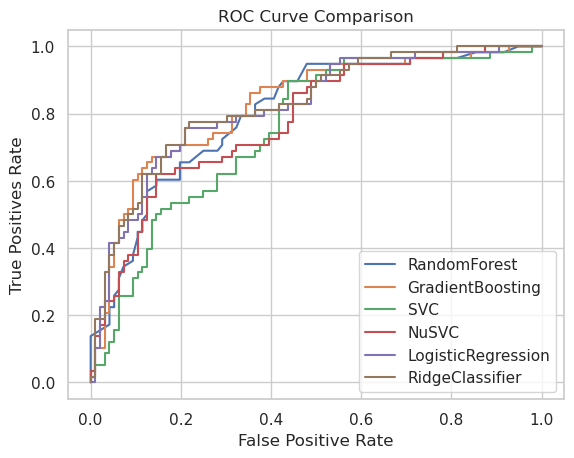

In [73]:
from sklearn.metrics import roc_curve

for name, y_score in y_scores.items():
    fpr , tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label = name )

plt.xlabel("False Positive Rate")
plt.ylabel("True Positives Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
    

**Observations** :
    Based upon above evaluation metrics we can clearly see that `RidgeClassifier` is performing better than all other models in all aspects. Our main focus should be now to maximize this score for our model. 

[Back to Top☝️](#INTRODUCTION-:)

### 3.3 Confusion Matrix

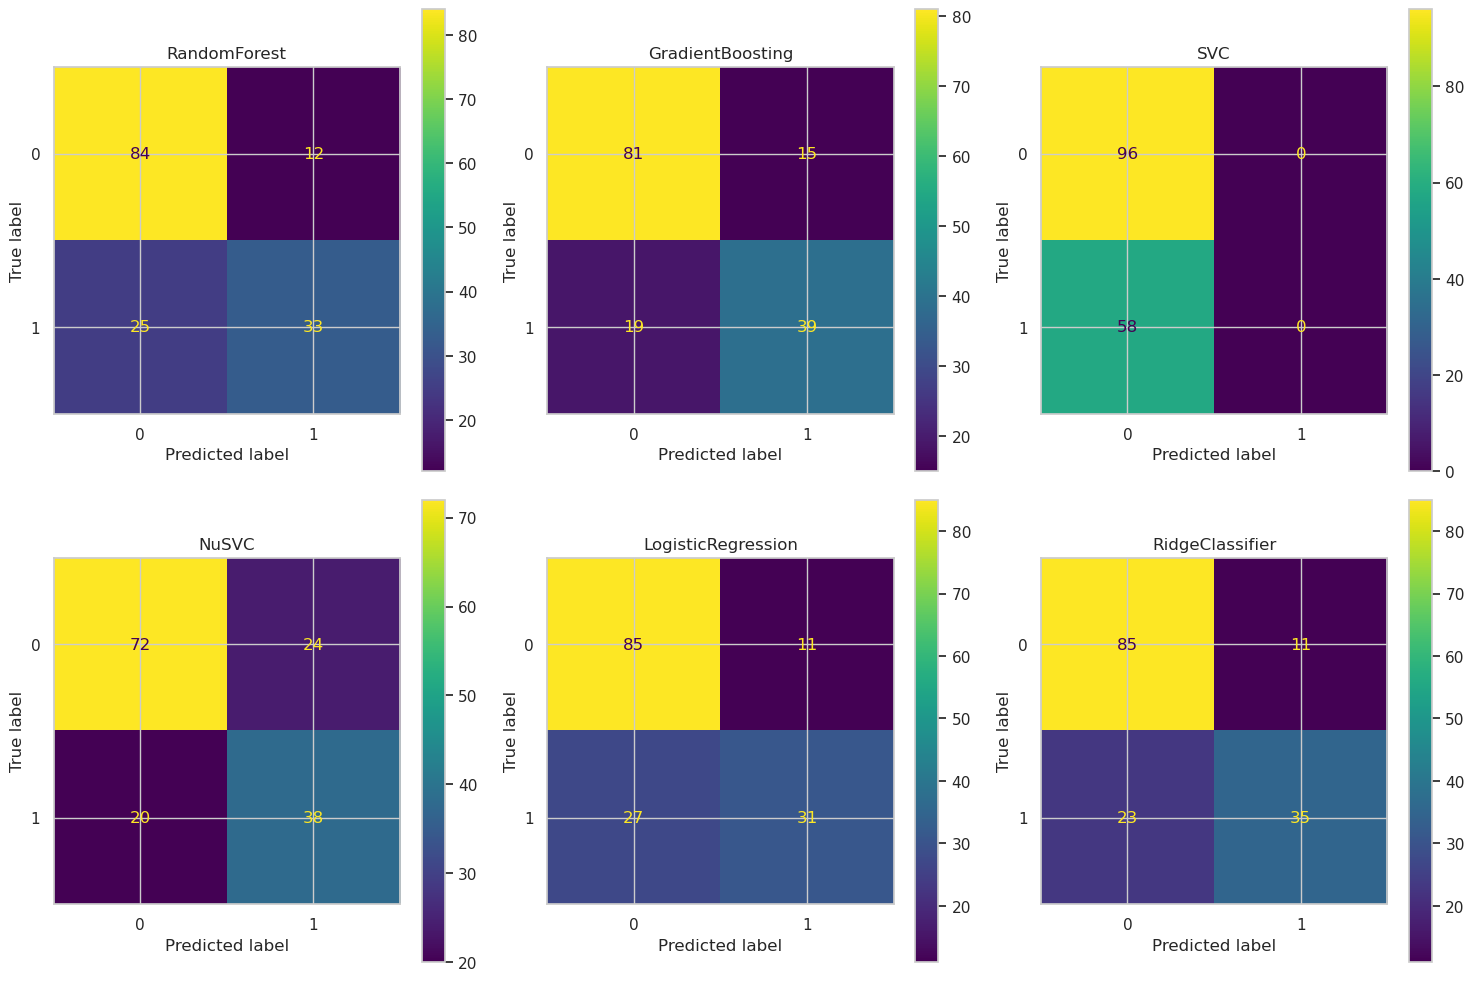

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize= (15,10))
for i, (name,preds) in enumerate(y_preds.items(),1):               #gives index and key-value , index starting from 1 not zero
    ax = plt.subplot(2,3,i)
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax = ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

**Observations :**

From the above evaluations we can clearly see `RidgeClassifier` is doing a slightly better work in almost all metrics but the main one being recall.

[Back to Top☝️](#INTRODUCTION-:)

### 3.4 Hyper Parameter Tunning
We will use `RandomizedSearchCV` which tries random combinations of hypeparameters and gives us the best one it could find.
For our chosen model `RidgeClassifier` we will try tuning the following hyperparameters : 



In [75]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0],   # Wide range from low to high regularization
    'class_weight': [None, 'balanced'],
    'solver': ['auto', 'sag', 'saga', 'lsqr', 'cholesky']  # solvers robust for small/medium data
}


clf = RidgeClassifier(random_state =42)
rs_clf = RandomizedSearchCV(clf, param_grid, cv = 5, random_state = 42)

rs_clf.fit(X_train_final,y_train)

RandomizedSearchCV(cv=5, estimator=RidgeClassifier(random_state=42),
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  50.0, 100.0],
                                        'class_weight': [None, 'balanced'],
                                        'solver': ['auto', 'sag', 'saga',
                                                   'lsqr', 'cholesky']},
                   random_state=42)

In [76]:
rs_clf.best_params_ , rs_clf.best_score_

({'solver': 'auto', 'class_weight': None, 'alpha': 0.001},
 np.float64(0.7655071304811408))

In [77]:
y_final_preds = rs_clf.predict(X_test_final)
evaluate(y_final_preds, y_test)

{'Accuracy': 0.7857142857142857,
 'Precision': 0.6206896551724138,
 'Recall': 0.7659574468085106,
 'f1_score': 0.6857142857142857}

**Results** : 
After tuning 

* Accuracy : from 0.779 to 0.785
* Precision : 0.603 to 0.620
* Recall : 0.760 to 0.765
* f1_score : 0.673 to 0.685

[Back to Top☝️](#INTRODUCTION-:)

### 3.5 Model Interpretation

    We will use SHAP( (SHapley Additive exPlanations)) to explain the model. Shap is very useful in getting insights of each feature about its importance in making predictions. We can use varous plots to visualise each feature importance and which values lead to what outcome.

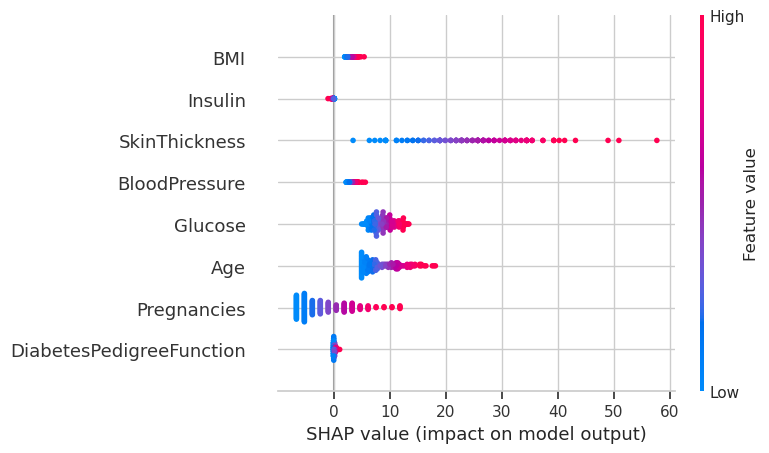

In [78]:
import shap
import numpy as np

best_ridge = rs_clf.best_estimator_ #best RidgeClassifier
# Create SHAP explainer
explainer = shap.LinearExplainer(best_ridge, X_train_final)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


**EXPLANATION**

* X-axis : Indicates shap values. Positive shap value push predcitions up towards predicting person has diabetes and vice versa.

* Y-axis : shows the feature importance low to high in making prediction.

* Red color : Higher feature value
* Blue dot : Lower fature value

1. BMI is the most important feature in predicting outcomes as it is at the top. Also the red dots have postive shap values and blue dots have negative shap value indicating that people with high BMI have a higher risk of diabetes and people with low BMI have lower risk of diabetes.
 
2. Insulin is also a important feature in predicitng outcomes.As red dots have negative shap value and blue have positive. So high insulin values shows a person has lower risk of having diabetes and higher insulin level shows a person have higher risk of diabetes.

3. SkinThickness is another important fetaure but it has a greater spread. It might correlate with BMI people with high skin thickness have high BMIand hence higher risk of diabtes.

4. BloodPresuure is intermmediately important feature in predicting outcomes. Higher BloodPressure values indicate high risk of having diabetes and lower BloodPressure indicates lesser risk of having diabetes.

In [79]:
from joblib import dump , load

dump(rs_clf, filename="DiabetesDetectionModel.joblib")

['DiabetesDetectionModel.joblib']

## References 
1. Scikit-learn Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
   
2. Kaggle Datasets: [https://www.kaggle.com](https://www.kaggle.com)

3. WHO Diabetes Factsheet: [https://www.who.int/news-room/fact-sheets/detail/diabetes](https://www.who.int/news-room/fact-sheets/detail/diabetes)


[Back to Top☝️](#INTRODUCTION-:)